In [1]:
from src.data import fire_perimeters
from src.data.adapters import calfire_perimeters
from src.data.adapters import mtbs
import geopandas as gpd
from src.constants import DATA_PATH, USER_PATH, GEDI_INTERMEDIATE_PATH
import seaborn as sns
import matplotlib.pyplot as plt
from src import constants
from src.data.utils import gedi_utils

sns.set_theme(style="white", palette="Set2")
import importlib
importlib.reload(fire_perimeters)
importlib.reload(mtbs)
from fastai.tabular.all import save_pickle, load_pickle

2023-12-26 01:22:17,180 DEBUG: Logger /home/jk871/fire-regen/src/data/fire_perimeters.py already set up. [in get_logger at /home/jk871/fire-regen/src/utils/logging_util.py:51]


NameError: name 'ba' is not defined

In [20]:
# Fetch simplified regions of interest - to avoid processing problems with really complicated shapes.
seki = gpd.read_file("../../data/shapefiles/seki_convex_hull.shp")
sierras = gpd.read_file("../../data/shapefiles/sierras_convex_hull.shp")

In [21]:
mtbs_db = fire_perimeters.MTBSFirePerimetersDB(sierras)

In [12]:
mtbs_fires = mtbs_db.perimeters[mtbs_db.perimeters.Incid_Type=="Wildfire"][['Event_ID', 'BurnBndAc', 'Incid_Name', 'Ig_Date', 'dNBR_offst', 'dNBR_stdDv', 'Low_T', 'Mod_T', 'High_T', 'geometry']]

In [26]:
mtbs_fires['Ig_Year'] = mtbs_fires.Ig_Date.dt.year

In [19]:
mtbs_fires['Low_T_adj'] = mtbs_fires.Low_T - mtbs_fires.dNBR_offst
mtbs_fires['Mod_T_adj'] = mtbs_fires.Mod_T - mtbs_fires.dNBR_offst
mtbs_fires['High_T_adj'] = mtbs_fires.High_T - mtbs_fires.dNBR_offst

(-500.0, 500.0)

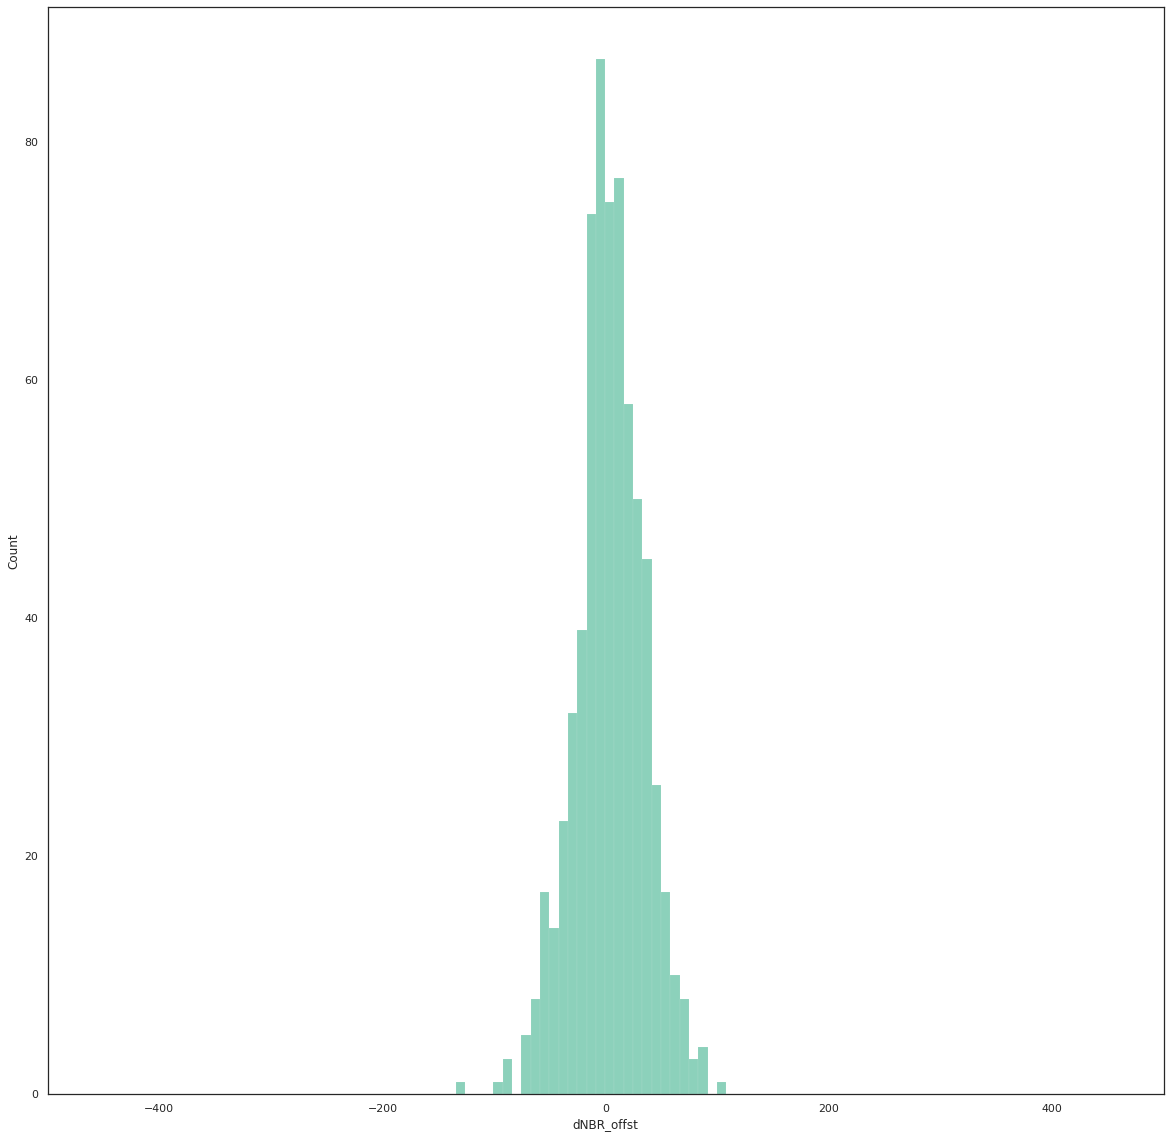

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.histplot(mtbs_fires, x='dNBR_offst', ax=ax)
ax.set_xlim((-500, 500))

(-500.0, 1000.0)

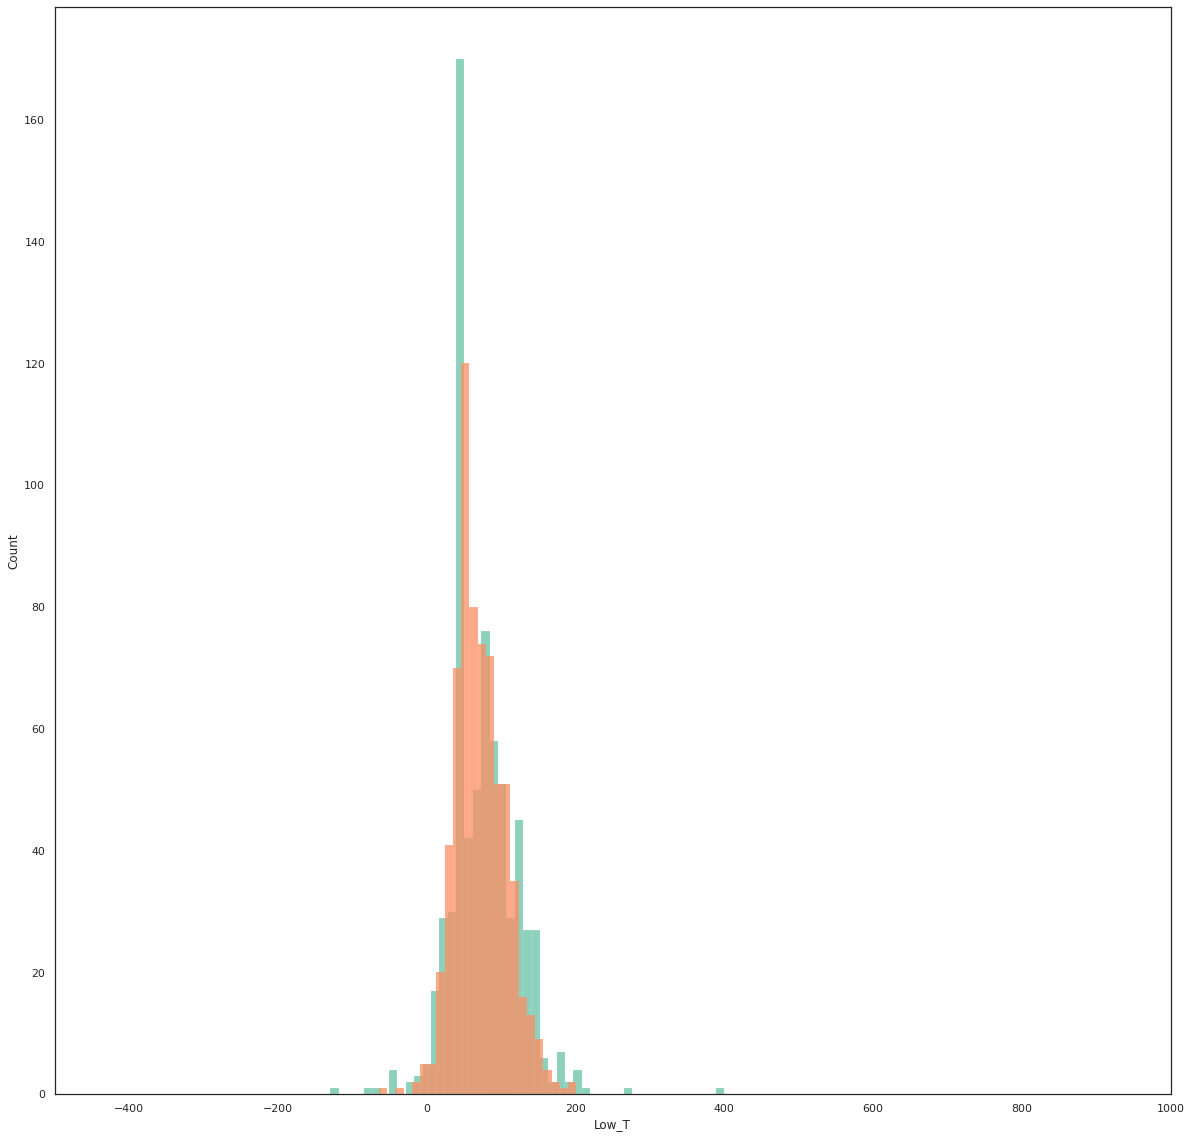

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.histplot(mtbs_fires, x='Low_T', ax=ax)
sns.histplot(mtbs_fires, x='Low_T_adj', ax=ax)
ax.set_xlim((-500, 1000))

(-500.0, 1000.0)

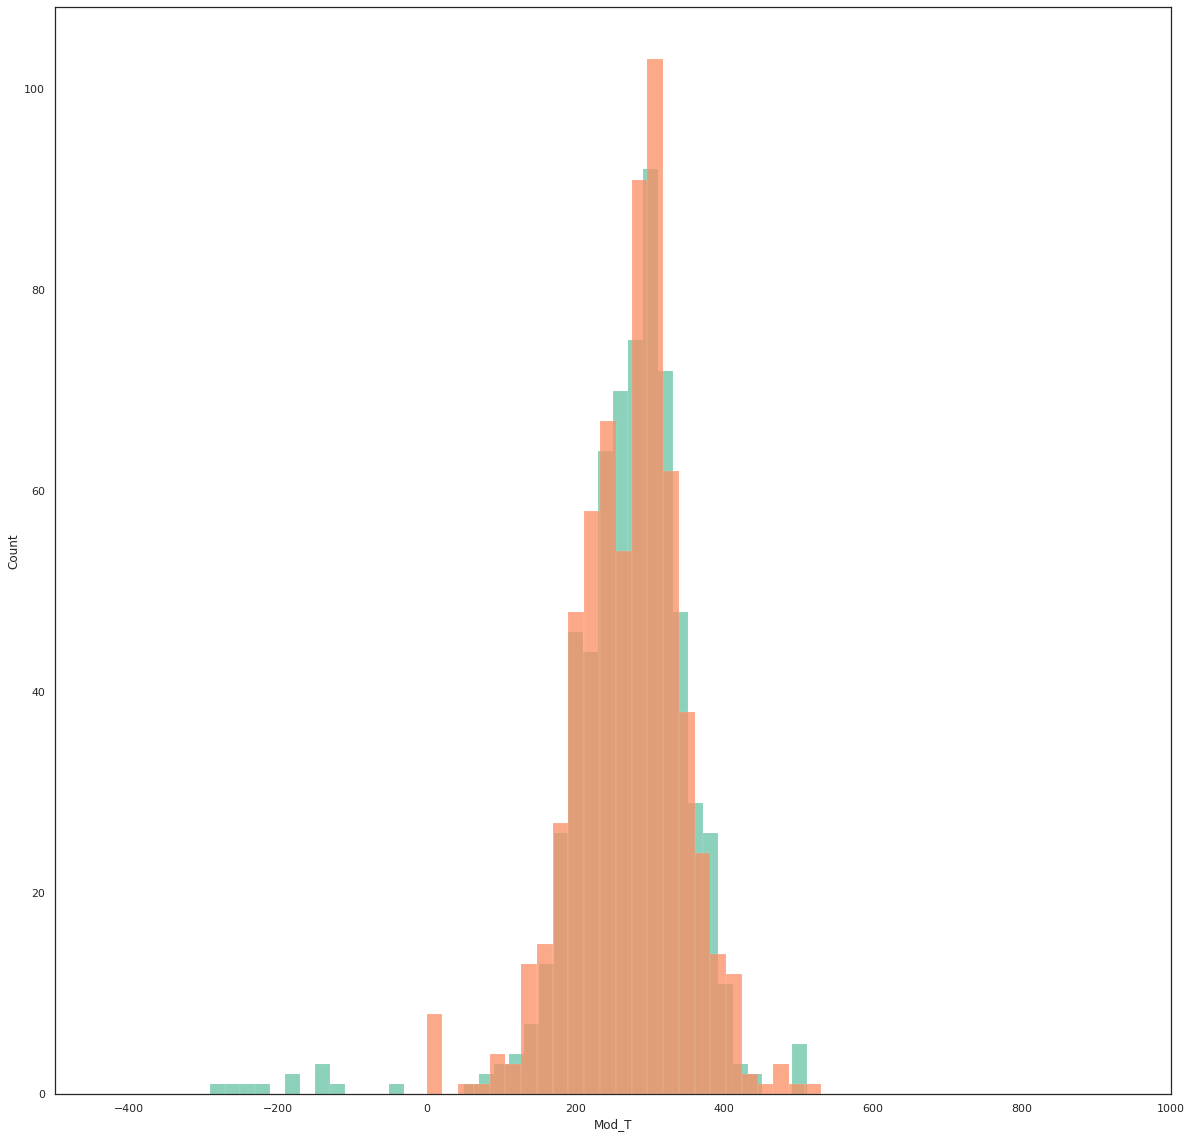

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.histplot(mtbs_fires, x='Mod_T', ax=ax)
sns.histplot(mtbs_fires, x='Mod_T_adj', ax=ax)
ax.set_xlim((-500, 1000))

(-500.0, 1000.0)

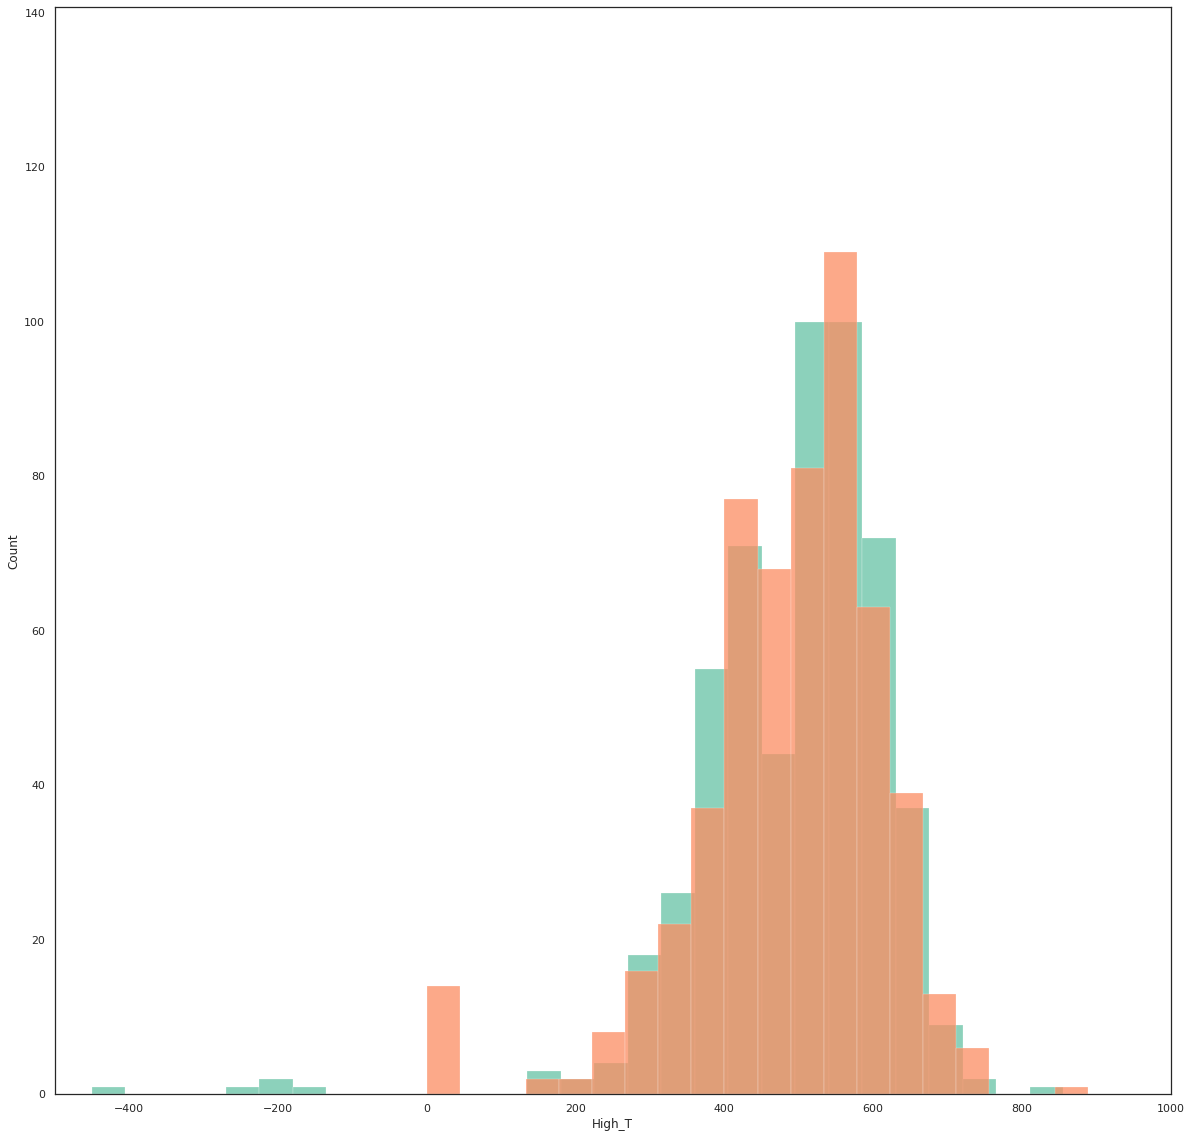

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.histplot(mtbs_fires, x='High_T', ax=ax)
sns.histplot(mtbs_fires, x='High_T_adj', ax=ax)
ax.set_xlim((-500, 1000))

(-500.0, 1000.0)

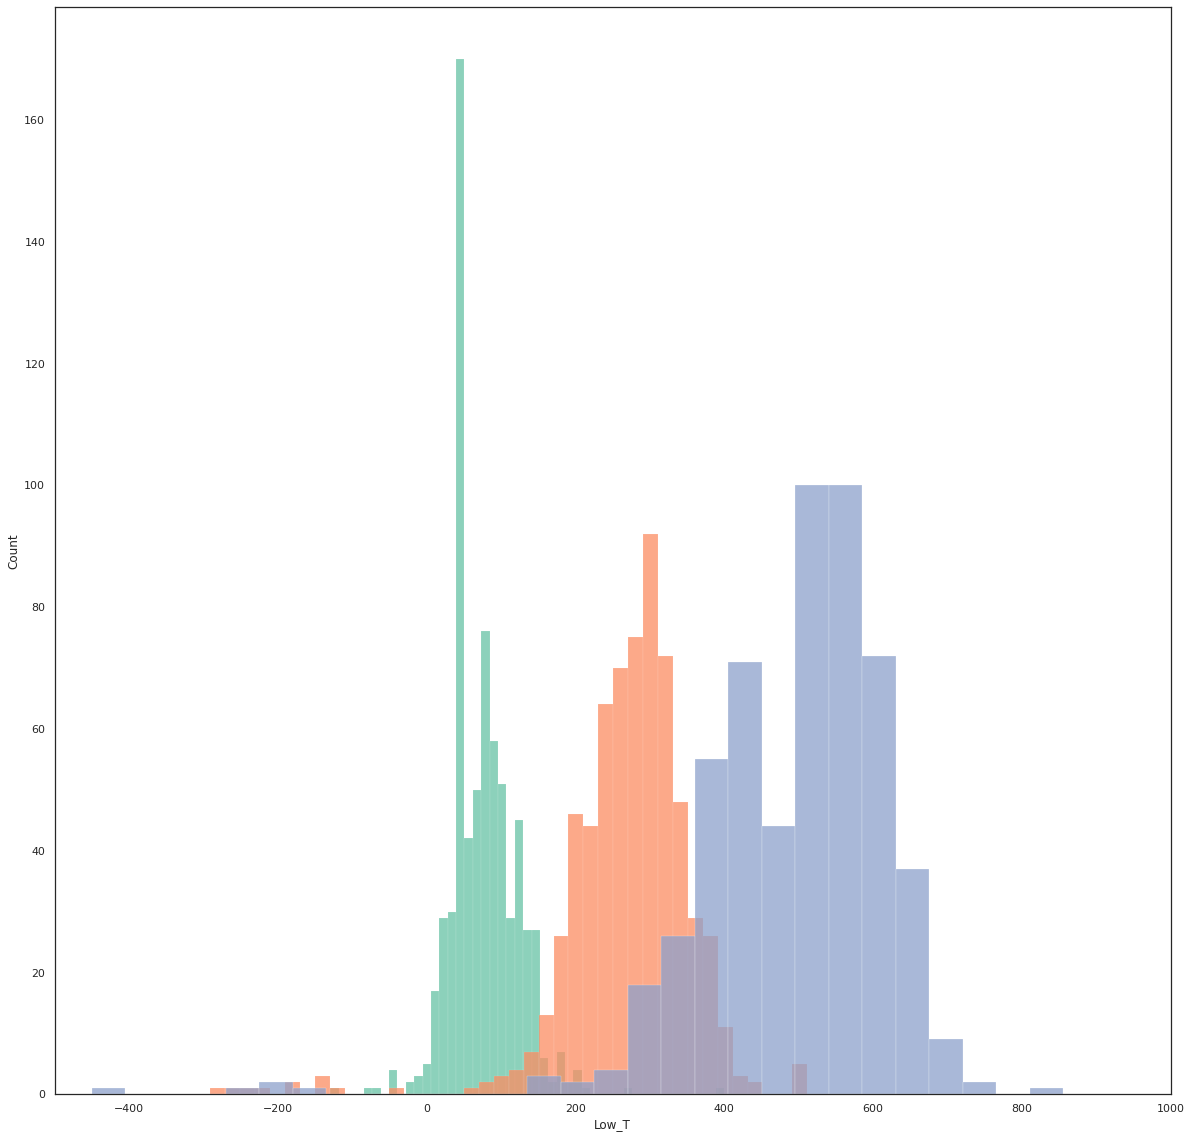

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.histplot(mtbs_fires, x='Low_T', ax=ax)
sns.histplot(mtbs_fires, x='Mod_T', ax=ax)
sns.histplot(mtbs_fires, x='High_T', ax=ax)
ax.set_xlim((-500, 1000))